<a href="https://colab.research.google.com/github/Frexander/Final_Portfolio/blob/master/Random_vs_Heuristic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gymnasium
!pip install numpy
!pip install matplotlib

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("Taxi-v3")

state_space = env.observation_space.n
action_space = env.action_space.n
Q_table = np.zeros([state_space, action_space])

episodes = 1000
max_steps = 100

training_rewards = []
average_rewards = []

In [ ]:
# Training result using random policy

for episode in range(episodes):
  state, info = env.reset()       #learned the hard way that the code will not run without resetting the environment...
  total_rewards = 0

  for step in range(max_steps):
    action = env.action_space.sample()    # Choose random action (explore)

    new_state, reward, terminated, truncated, info = env.step(action) # Performa action and observe resulting state

    state = new_state       # Update state
    total_rewards += reward # Update total reward

    if terminated or truncated:
      break

  training_rewards.append(total_rewards)
  average_rewards.append(np.mean(training_rewards[-25:]))

  if episode % 100 == 0:
    print(f"Episode number: {episode}")
    print(f"Training reward: {total_rewards}")

Episode number: 0
Training reward: -370
Episode number: 100
Training reward: -406
Episode number: 200
Training reward: -361
Episode number: 300
Training reward: -415
Episode number: 400
Training reward: -370
Episode number: 500
Training reward: -334
Episode number: 600
Training reward: -397
Episode number: 700
Training reward: -415
Episode number: 800
Training reward: -334
Episode number: 900
Training reward: -388


In [ ]:
# Training using heuristic policy



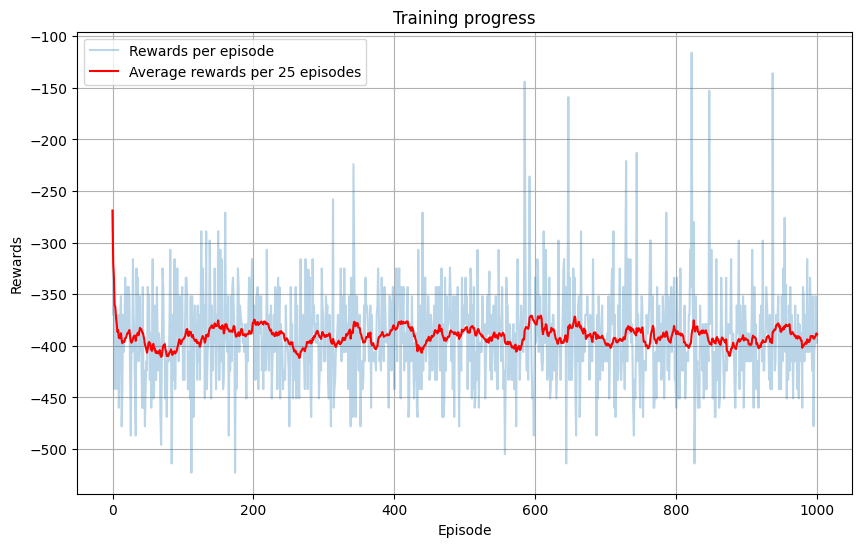

In [ ]:
# Vizualising training results
plt.figure(figsize=(10, 6))
plt.plot(training_rewards, label = 'Rewards per episode', alpha = 0.3)
plt.plot(average_rewards, label = 'Average rewards per 25 episodes', color = 'red')
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.title('Training progress')
plt.legend()
plt.grid(True)
plt.show()

# Visualising trained agent:

def vizualise_solution(env, Q_table):
  state, info = env.reset()
  total_reward = 0

  for step in range(max_steps):
    env.render()
    time.sleep(1)

    action = np.argmax(Q_table[state,:])

    state, reward, terminated, truncated, info = env.step(action)
    total_reward += reward

    if terminated or truncated:
      env.render()
      time.sleep(1)
      break

  print(f"Total reward is: {total_reward}")